In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata

# Extracting Average Luminance For Each *Gravity* Film Clip Frame

In [2]:
def get_frame_luminance(cap):
    aver_bright_list = []
    
    ret, frame = cap.read()
    
    while ret:
        # Extract average luminance (hs*V*) for each frame
        hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
        value = np.sum(hsv[:,:,2])
        pxl = hsv.shape[0] * hsv.shape[1]
        aver_bright = value / pxl

        aver_bright_list.append(aver_bright)
        
        ret, frame = cap.read()
    
    cap.release()
    cv2.destroyAllWindows()
    return aver_bright_list 

In [3]:
cap1 = cv2.VideoCapture('/scratch/gpfs/mayaar/GravityECoG/sourcedata/grav1.mp4')
fps = cap1.get(cv2.CAP_PROP_FPS)
fps

23.976023976023978

In [4]:
cap1 = cv2.VideoCapture('/scratch/gpfs/mayaar/GravityECoG/sourcedata/grav1.mp4')
average_luminance_per_frame_grav1 = get_frame_luminance(cap1)
len(average_luminance_per_frame_grav1)

10795

In [5]:
cap2 = cv2.VideoCapture('/scratch/gpfs/mayaar/GravityECoG/sourcedata/grav2.mp4')
average_luminance_per_frame_grav2 = get_frame_luminance(cap2)
len(average_luminance_per_frame_grav2)

10799

# Interpolating Luminance To ECoG Sampling Frequency (512 Hz)

In [6]:
grav1_audio_len = 230536
grav1_video_len = 10795
freq_ratio_1 = grav1_audio_len / grav1_video_len

In [7]:
freq_ratio_1

21.355812876331633

In [8]:
grav2_audio_len = 230622
grav2_video_len = 10799
freq_ratio_2 = grav2_audio_len / grav2_video_len

In [9]:
freq_ratio_2

21.355866283915176

In [10]:
interp_coord_g1 = np.arange(0, len(average_luminance_per_frame_grav1), 1 / freq_ratio_1)
interp_coord_g2 = np.arange(0, len(average_luminance_per_frame_grav2), 1 / freq_ratio_2)

In [11]:
x_coord_g1 = np.arange(len(average_luminance_per_frame_grav1))
x_coord_g2 = np.arange(len(average_luminance_per_frame_grav2))

In [12]:
luminance_g1 = np.interp(interp_coord_g1, x_coord_g1, average_luminance_per_frame_grav1)
luminance_g2 = np.interp(interp_coord_g2, x_coord_g2, average_luminance_per_frame_grav2)

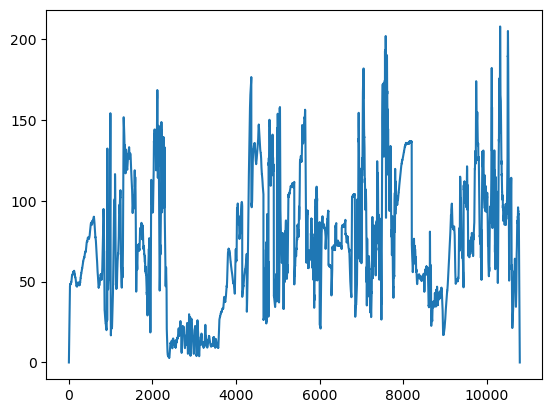

In [13]:
plt.plot(x_coord_g1, average_luminance_per_frame_grav1)

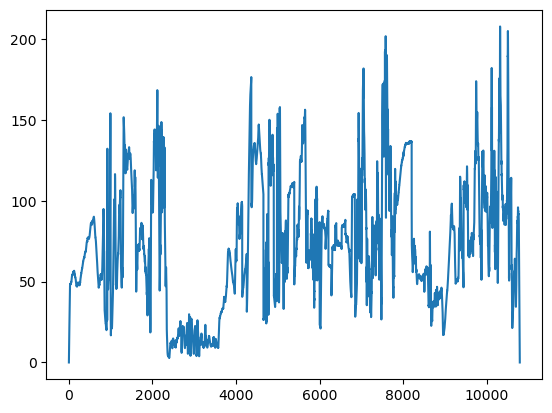

In [14]:
plt.plot(interp_coord_g1, luminance_g1)

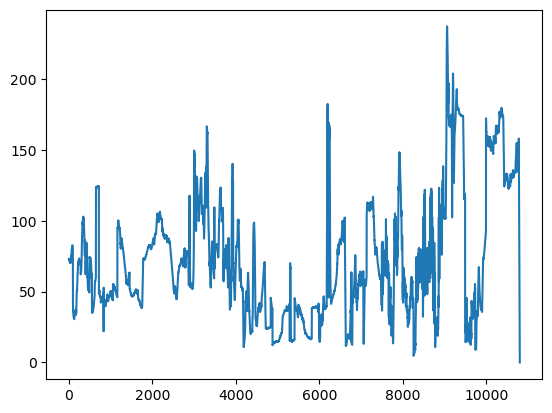

In [15]:
plt.plot(x_coord_g2, average_luminance_per_frame_grav2)

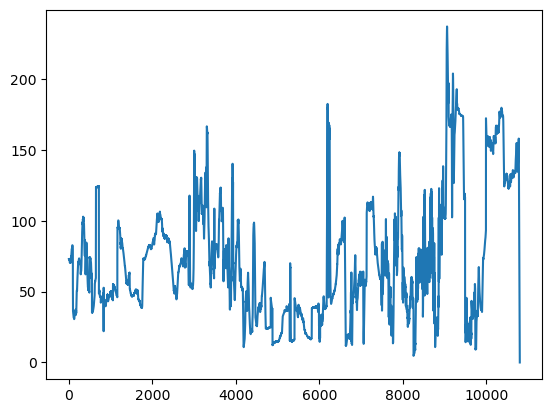

In [16]:
plt.plot(interp_coord_g2, luminance_g2)

In [ ]:
np.save("luminance_g1.npy", luminance_g1)
np.save("luminance_g2.npy", luminance_g2)

## Tie-Ranking Luminance

In [2]:
luminance_g1 = np.load("luminance_g1.npy", allow_pickle = True)
luminance_g2 = np.load("luminance_g2.npy", allow_pickle = True)

tie_ranked_l1 = rankdata(luminance_g1)
tie_ranked_l2 = rankdata(luminance_g2)

In [11]:
np.save("tr_lum_g1.npy", tie_ranked_l1)
np.save("tr_lum_g2.npy", tie_ranked_l2)

## Saving Shuffled Luminance

In [ ]:
shuf_lum_g1 = np.zeros((1000, 230536))

for i in range(1000):
    shuf_lum_g1[i,:] = np.load("LumSurrog/shuffled-luminance1-" + str(i) + ".npy", allow_pickle = True)[0,:]

In [ ]:
shuf_lum_g2 = np.zeros((1000, 230622))

for i in range(1000):
    shuf_lum_g2[i,:] = np.load("LumSurrog/shuffled-luminance2-" + str(i) + ".npy", allow_pickle = True)[0,:]

In [ ]:
np.save("shuffled_luminance_g1.npy", shuf_lum_g1)
np.save("shuffled_luminance_g2.npy", shuf_lum_g2)

## Tie-Ranking Shuffled Luminance

In [13]:
shuf_lum_g1 = np.load("shuffled_luminance_g1.npy", allow_pickle = True)
shuf_lum_g2 = np.load("shuffled_luminance_g2.npy", allow_pickle = True)

In [15]:
tr_shuf_lum_g1 = rankdata(shuf_lum_g1, axis=1)

In [16]:
tr_shuf_lum_g2 = rankdata(shuf_lum_g2, axis=1)

In [28]:
np.save("tr_shuffled_luminance_g1.npy", tr_shuf_lum_g1)
np.save("tr_shuffled_luminance_g2.npy", tr_shuf_lum_g2)